# Random Forrests for Exploration of DEAP Dataset
Fingerprinting with OMA modes has worked really well. What about in tabular format?

Fingerprinting is good, try Quads

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import datasets, svm, metrics, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
path=pathlib.Path('/home/tris/Documents/EEG_data/DMD_DEAP')
path

PosixPath('/home/tris/Documents/EEG_data/DMD_DEAP')

In [5]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [6]:
df=df.div(9) #normalize
df.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.900000,0.812222,0.808889,0.941111
2,0.953333,0.837778,1.000000,0.786667
3,0.548889,0.667778,0.680000,0.895556
4,0.773333,0.435556,0.798889,0.672222


In [7]:
# df=df.loc[df.index.repeat(4)].reset_index(drop=True)

In [8]:
df.tail()

,valence,arousal,dominance,liking
1275,0.434444,0.773333,0.646667,0.346667
1276,0.312222,0.681111,0.673333,0.115556
1277,0.338889,0.778889,0.566667,0.122222
1278,0.443333,0.796667,0.538889,0.111111
1279,0.794444,0.447778,1.000000,0.208889


In [9]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)

In [10]:
df['file_name']=filenames
df['subject_label']=subject_labels
df=df[['file_name','subject_label','valence','arousal']]
df.tail()

,file_name,subject_label,valence,arousal
1275,S32T36,32,0.434444,0.773333
1276,S32T37,32,0.312222,0.681111
1277,S32T38,32,0.338889,0.778889
1278,S32T39,32,0.443333,0.796667
1279,S32T40,32,0.794444,0.447778


In [11]:
df.loc[(df['valence'] >= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 0
df.loc[(df['valence'] <= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 1
df.loc[(df['valence'] <= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 2  
df.loc[(df['valence'] >= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 3
df.head()

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,0.0
1,S1T2,1,0.900000,0.812222,0.0
2,S1T3,1,0.953333,0.837778,0.0
3,S1T4,1,0.548889,0.667778,0.0
4,S1T5,1,0.773333,0.435556,3.0


In [12]:
df=df.reset_index(drop=True); df

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,0.0
1,S1T2,1,0.900000,0.812222,0.0
2,S1T3,1,0.953333,0.837778,0.0
3,S1T4,1,0.548889,0.667778,0.0
4,S1T5,1,0.773333,0.435556,3.0
...,...,...,...,...,...
1275,S32T36,32,0.434444,0.773333,1.0
1276,S32T37,32,0.312222,0.681111,1.0
1277,S32T38,32,0.338889,0.778889,1.0
1278,S32T39,32,0.443333,0.796667,1.0


In [13]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/OMA/robots')
path

PosixPath('/media/tris/tris_files/EEG_datasets/OMA/robots')

In [14]:
df.to_csv(path/'labels_proc_window.csv', index=False)

In [15]:
df = pd.read_csv(path/'labels_proc_window.csv') #load labels
df.tail()

,file_name,subject_label,valence,arousal,emotion_quad
1275,S32T36,32,0.434444,0.773333,1.0
1276,S32T37,32,0.312222,0.681111,1.0
1277,S32T38,32,0.338889,0.778889,1.0
1278,S32T39,32,0.443333,0.796667,1.0
1279,S32T40,32,0.794444,0.447778,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68b0441410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f68b031eed0>]], dtype=object)

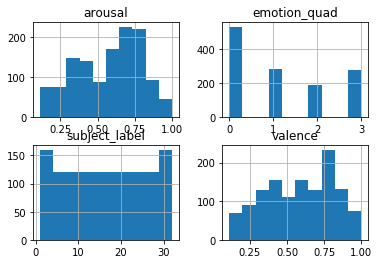

In [16]:
df.hist()

In [17]:
PATH = "/media/tris/tris_files/EEG_datasets/OMA/robots"

In [37]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/OMA/robots/OMA_deap_NOwindow_head.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,-0.272850,-0.171058,-0.107482,-0.241476,-0.644874,-0.465567,0.025647,0.123537,...,-0.066326,0.133498,0.178327,0.024694,0.382243,0.300119,0.472597,0.475620,0.142434,12.717061
1,1,2,-0.342873,-0.236696,-0.171148,-0.205817,-0.547290,-0.596651,0.038572,0.271317,...,0.076651,-0.199041,-0.215854,-0.124692,-0.772587,-0.394084,-0.969624,-0.926912,0.182059,12.830520
2,1,3,-0.174481,0.056718,0.153270,-0.009266,-0.524212,-0.443412,0.297779,0.475316,...,-0.006360,-0.141247,-0.289165,-0.220311,-0.636643,-0.400598,-0.792500,-0.762183,0.131674,12.581391
3,1,4,0.042121,0.193538,0.282214,0.302303,-0.319410,-0.401406,0.399773,0.628729,...,-0.115869,-0.149079,0.053099,0.186476,0.389983,0.166997,0.584623,0.547285,0.094038,12.103460
4,1,5,0.153816,0.295784,0.360060,0.201468,-0.024667,0.128282,0.184452,0.166842,...,0.128709,-0.071937,-0.044726,-0.007633,-0.304688,-0.153691,-0.407159,-0.436772,0.178637,13.719345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,32,36,0.042077,0.176027,-0.003989,0.111886,-0.142465,-0.042681,-0.136961,0.167865,...,0.004215,-0.010932,0.023583,0.010607,0.002187,-0.011306,0.015924,-0.002923,0.263352,30.169981
1276,32,37,-0.007279,-0.111814,0.008285,-0.068342,0.098407,0.028579,0.090243,-0.121686,...,0.006198,-0.007672,0.023867,0.013645,0.008459,-0.008225,0.021393,0.003919,0.053634,39.804373
1277,32,38,0.029972,0.165903,-0.026319,0.086238,-0.144387,-0.055708,-0.135066,0.173386,...,-0.018507,0.020033,-0.006926,-0.001784,-0.008800,0.004622,0.001826,-0.001092,0.194905,31.412533
1278,32,39,0.006916,0.121373,-0.013406,0.069159,-0.115734,-0.032974,-0.103808,0.136997,...,-0.004632,0.006113,0.008237,0.007152,-0.002770,-0.003868,0.009305,-0.002330,0.099722,33.920605


In [38]:
subject_y = df_raw['Subject']
# df_learn = df_raw.join(emotion_quad)
df_learn=df_raw.drop(columns=['Subject'])
df_learn.head()

,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,-0.272850,-0.171058,-0.107482,-0.241476,-0.644874,-0.465567,0.025647,0.123537,0.084049,...,-0.066326,0.133498,0.178327,0.024694,0.382243,0.300119,0.472597,0.475620,0.142434,12.717061
1,2,-0.342873,-0.236696,-0.171148,-0.205817,-0.547290,-0.596651,0.038572,0.271317,0.200014,...,0.076651,-0.199041,-0.215854,-0.124692,-0.772587,-0.394084,-0.969624,-0.926912,0.182059,12.830520
2,3,-0.174481,0.056718,0.153270,-0.009266,-0.524212,-0.443412,0.297779,0.475316,0.307132,...,-0.006360,-0.141247,-0.289165,-0.220311,-0.636643,-0.400598,-0.792500,-0.762183,0.131674,12.581391
3,4,0.042121,0.193538,0.282214,0.302303,-0.319410,-0.401406,0.399773,0.628729,0.400342,...,-0.115869,-0.149079,0.053099,0.186476,0.389983,0.166997,0.584623,0.547285,0.094038,12.103460
4,5,0.153816,0.295784,0.360060,0.201468,-0.024667,0.128282,0.184452,0.166842,0.008648,...,0.128709,-0.071937,-0.044726,-0.007633,-0.304688,-0.153691,-0.407159,-0.436772,0.178637,13.719345


In [39]:
df_learn.iloc[[40],:]

,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
40,1,0.267487,-0.555741,0.067834,-0.189822,0.132533,-0.042658,-0.071016,-0.394874,-0.277133,...,0.021766,0.031713,-0.074491,-0.032984,-0.054427,-0.003401,-0.146404,0.01236,0.040532,40.425306


In [40]:
os.makedirs('tmp', exist_ok=True)
df_learn.to_feather('tmp/eeg-raw')

In [41]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,-0.272850,-0.171058,-0.107482,-0.241476,-0.644874,-0.465567,0.025647,0.123537,0.084049,...,-0.066326,0.133498,0.178327,0.024694,0.382243,0.300119,0.472597,0.475620,0.142434,12.717061
1,2,-0.342873,-0.236696,-0.171148,-0.205817,-0.547290,-0.596651,0.038572,0.271317,0.200014,...,0.076651,-0.199041,-0.215854,-0.124692,-0.772587,-0.394084,-0.969624,-0.926912,0.182059,12.830520
2,3,-0.174481,0.056718,0.153270,-0.009266,-0.524212,-0.443412,0.297779,0.475316,0.307132,...,-0.006360,-0.141247,-0.289165,-0.220311,-0.636643,-0.400598,-0.792500,-0.762183,0.131674,12.581391
3,4,0.042121,0.193538,0.282214,0.302303,-0.319410,-0.401406,0.399773,0.628729,0.400342,...,-0.115869,-0.149079,0.053099,0.186476,0.389983,0.166997,0.584623,0.547285,0.094038,12.103460
4,5,0.153816,0.295784,0.360060,0.201468,-0.024667,0.128282,0.184452,0.166842,0.008648,...,0.128709,-0.071937,-0.044726,-0.007633,-0.304688,-0.153691,-0.407159,-0.436772,0.178637,13.719345


In [42]:
df_raw.iloc[[100],[300]]

,Imag_Comp12_Mode3
100,-0.014442


Text(0.5, 1.0, 'zeta6')

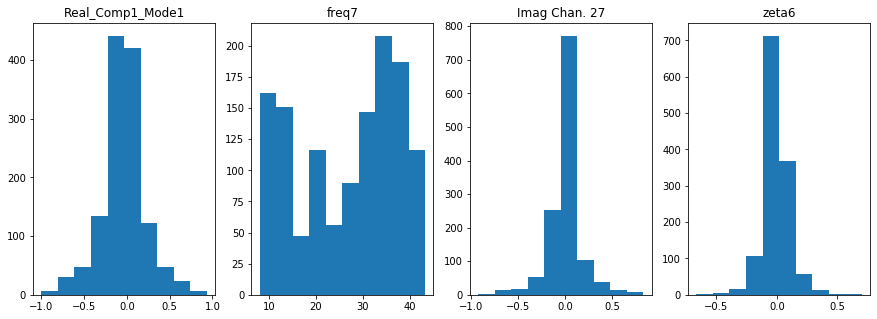

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.fn7)
axs[1].set_title('freq7')
axs[2].hist(df_raw.Imag_Comp1_Mode3)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta6)
axs[3].set_title('zeta6')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    df_raw, subject_y, test_size=0.2, shuffle=True)

In [46]:
classifier = AdaBoostClassifier(n_estimators=40)

In [47]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40)

In [48]:
predicted = classifier.predict(X_test)

/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier AdaBoostClassifier(n_estimators=40):
              precision    recall  f1-score   support

           1       0.43      0.43      0.43         7
           2       0.02      1.00      0.05         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         4
          16       0.11      0.17      0.13         6
       

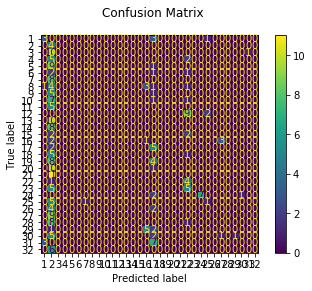

In [49]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [50]:
classifier = svm.SVC(gamma=0.2, kernel='poly', degree=3)

In [51]:
classifier.fit(X_train, y_train)

SVC(gamma=0.2, kernel='poly')

In [52]:
predicted = classifier.predict(X_test)

Classification report for classifier SVC(gamma=0.2, kernel='poly'):
              precision    recall  f1-score   support

           1       0.75      0.43      0.55         7
           2       0.00      0.00      0.00         4
           3       0.54      0.64      0.58        11
           4       0.17      0.14      0.15         7
           5       0.33      0.20      0.25        10
           6       0.14      0.25      0.18         4
           7       0.29      0.25      0.27         8
           8       0.75      0.30      0.43        10
           9       0.43      0.50      0.46         6
          10       0.43      0.33      0.38         9
          11       0.14      0.20      0.17         5
          12       0.62      0.45      0.53        11
          13       0.36      0.40      0.38        10
          14       0.00      0.00      0.00         8
          15       0.22      0.50      0.31         4
          16       0.50      0.33      0.40         6
          17 

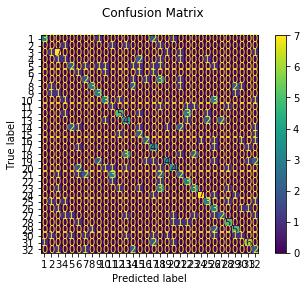

In [53]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [54]:
classifier = tree.DecisionTreeClassifier()

In [55]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
predicted = classifier.predict(X_test)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           1       0.50      0.14      0.22         7
           2       0.67      1.00      0.80         4
           3       1.00      0.55      0.71        11
           4       1.00      0.57      0.73         7
           5       0.67      0.40      0.50        10
           6       0.50      0.75      0.60         4
           7       0.67      0.75      0.71         8
           8       0.60      0.60      0.60        10
           9       0.43      0.50      0.46         6
          10       0.42      0.56      0.48         9
          11       0.80      0.80      0.80         5
          12       0.46      0.55      0.50        11
          13       0.67      0.60      0.63        10
          14       0.75      0.75      0.75         8
          15       0.30      0.75      0.43         4
          16       0.67      0.33      0.44         6
          17      

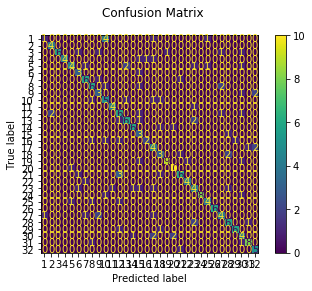

In [57]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

[Text(255.21827194385315, 215.86434782608694, 'X[88] <= 0.624\ngini = 0.969\nsamples = 1024\nvalue = [33, 36, 29, 33, 30, 36, 32, 30, 34, 31, 35, 29, 30, 32, 36, 34, 33, 34, 28\n29, 29, 35, 30, 30, 33, 34, 31, 31, 32, 31, 30, 34]'),
 Text(252.20883374160599, 212.71304347826086, 'X[396] <= 8.441\ngini = 0.968\nsamples = 1003\nvalue = [33, 36, 29, 33, 30, 36, 32, 30, 34, 31, 35, 29, 30, 32, 36, 34, 33, 34, 28\n29, 29, 35, 30, 9, 33, 34, 31, 31, 32, 31, 30, 34]'),
 Text(215.267774315309, 209.56173913043477, 'X[13] <= 0.297\ngini = 0.72\nsamples = 67\nvalue = [0, 0, 0, 0, 0, 0, 1, 12, 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 1, 0, 17, 6, 0, 2]'),
 Text(206.99181925912924, 206.4104347826087, 'X[462] <= 16.09\ngini = 0.751\nsamples = 48\nvalue = [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 1, 0, 17, 6, 0, 2]'),
 Text(199.46822375351124, 203.2591304347826, 'X[461] <= 0.083\ngini = 0.547\nsamples = 31\nvalue = [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0,

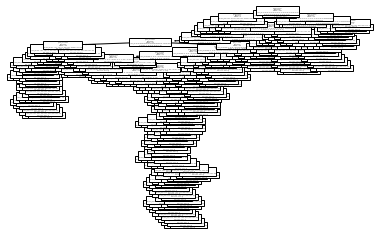

In [58]:
tree.plot_tree(classifier) 

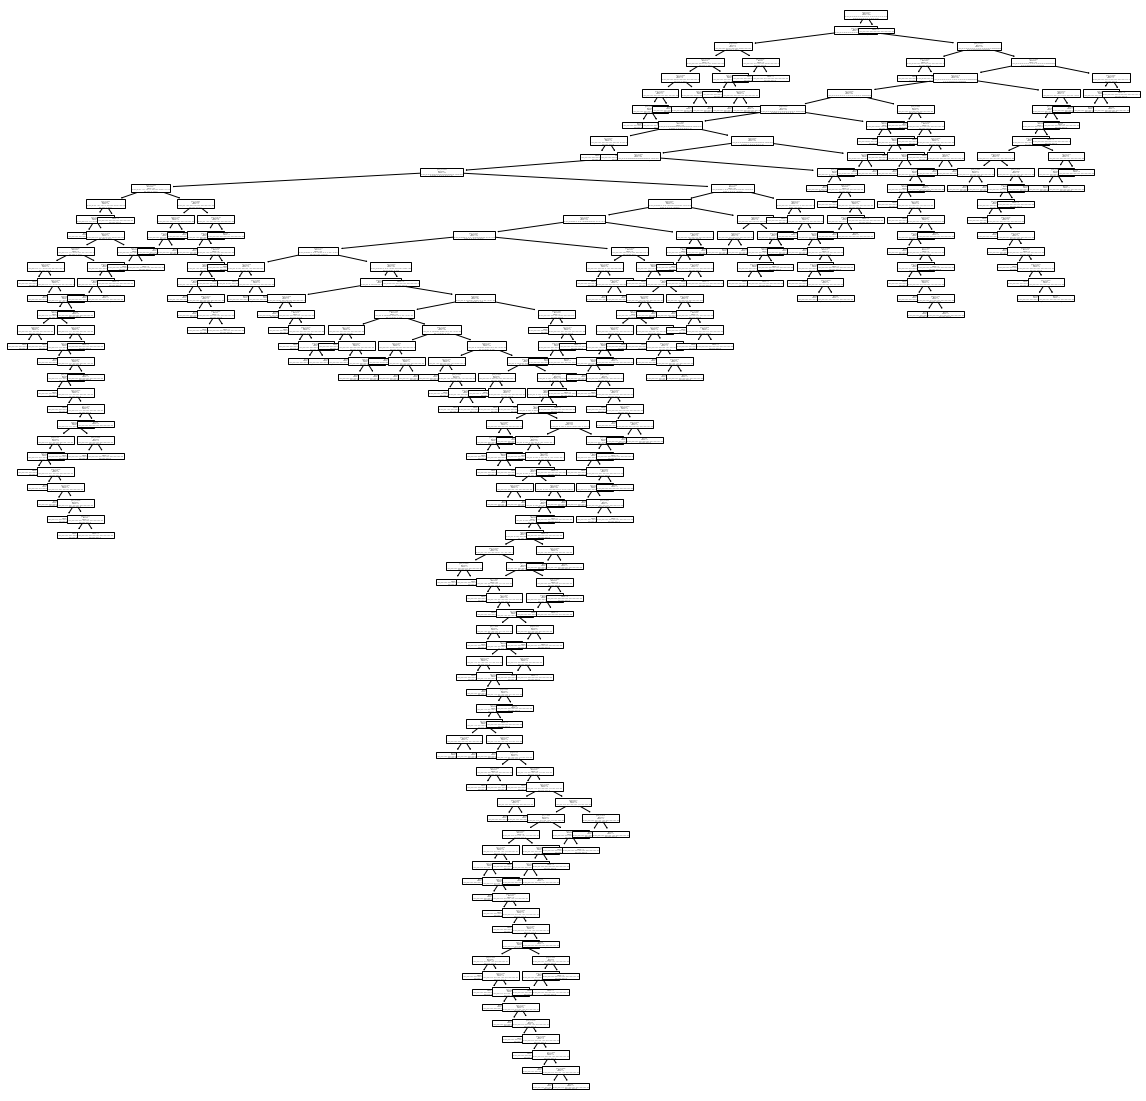

In [59]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(classifier)
plt.show()

In [60]:
classifier = RandomForestClassifier(n_estimators=3)

In [61]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [62]:
predicted = classifier.predict(X_test)

/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier RandomForestClassifier(n_estimators=3):
              precision    recall  f1-score   support

           1       0.56      0.71      0.63         7
           2       0.21      0.75      0.33         4
           3       0.25      0.73      0.37        11
           4       0.45      0.71      0.56         7
           5       0.58      0.70      0.64        10
           6       0.21      0.75      0.33         4
           7       0.44      1.00      0.62         8
           8       0.67      0.80      0.73        10
           9       0.25      0.50      0.33         6
          10       1.00      0.33      0.50         9
          11       0.38      0.60      0.46         5
          12       0.42      0.45      0.43        11
          13       0.56      0.50      0.53        10
          14       0.40      0.25      0.31         8
          15       0.25      0.50      0.33         4
          16       0.33      0.17      0.22         6
    

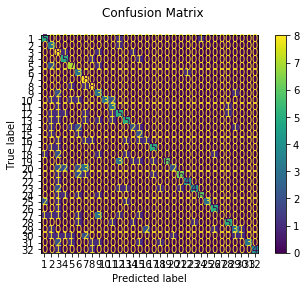

In [63]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    df1_raw, emotion_quad1, test_size=0.2, shuffle=True)

In [69]:
classifier = RandomForestClassifier(n_estimators=3)

In [70]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [71]:
predicted = classifier.predict(X_test)

Classification report for classifier RandomForestClassifier(n_estimators=3):
              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.10      0.17      0.12         8
weighted avg       0.15      0.25      0.19         8


Confusion matrix:
[[2 0 1 0]
 [1 0 1 0]
 [0 0 0 1]
 [2 0 0 0]]


/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


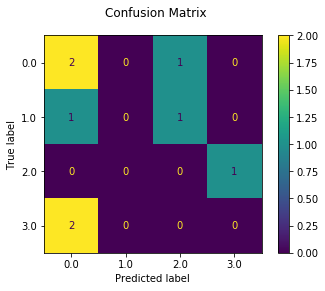

In [72]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)